# Lab_02 군집화

### Context
#### Clustering
+ k-means Clustering
+ Hierarchical Clustering

#### Evaluation
+ Silhouette

In [3]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine)


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [22]:
print(type(wine))

<class 'sklearn.utils.Bunch'>


이번 군집화 실습을 위해 sklearn 내장 데이터인 와인 데이터를 불러오겠습니다.<br>
와인 데이터셋은 알콜, 말산, 페놀 등 13개의 변수를 가지고 있으며, 1,2,3 와인 등급을 라벨 데이터로 가지고 있습니다.

In [14]:
#decription
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [15]:
data = wine.data #데이타 컬럼
label = wine.target #데이타의 레이블임. 목표(Target): 라벨, 타겟값, 목표값이라고도 부르며 입력데이터( 특성 행렬(Feature Matrix))에서 예측하려는 것. 와인의 품종
columns = wine.feature_names #feature_names는 특성의 이름이다.(와인의 성분)

In [18]:
print(data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [19]:
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
print(columns)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [25]:
data = pd.DataFrame(data, columns = columns) #칼럼과 레이블을 이용해서 데이터프레임을 만들 수 있음. 데이터 프레임은 2차원 테이블 데이터
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [26]:
data.shape

(178, 13)

In [27]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Clustering
클러스터링은 주어진 데이터들의 특성을 고려해 데이터 클러스터를 정의하고, 클러스터를 대표할 수 있는 대표점을 찾는 비지도 학습의 대표적인 알고리즘 입니다.<br>
간단히 말해서, 비슷한 특성을 가진 데이터끼리 묶는다고 말할 수 있습니다. 

### 1. k-Means 클러스터링
k-means 클러스터링은 대표적인 클러스터링 알고리즘 중 하나로, 각 클러스터에 할당된 데이터 포인트들의 평균 좌표를 이용해 중심점을 반복적으로 업데이트하며 클러스터를 형성하는 알고리즘 입니다.<br><br>
k-means Clustering 알고리즘은 3가지 단계로 이루어집니다.<br>
Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
    중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당합니다.
    <br>가까운 중심점을 찾을 때는, **유클리드 거리**를 사용합니다.<br>
Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
    중심점은 클러스터 내부 점들 좌표의 **산술 평균(mean)**
    으로 합니다.<br>
Step 3. 각 클러스터의 할당이 바뀌지 않을 때까지 반복합니다.

 ### 점과 점사이의 거리를 어떻게 측정할 수 있을까? 

 k-means clustering은 거리 기반 알고리즘이므로 여러가지 방법으로 거리를 측정할 수 있습니다.<br>
 #### 1. Manhattan Distance - 각 축에 대해 수직으로만 이동하여 계산하는 거리 측정방식
 $$D(x,y) = {{\sum_{i=1}^{d}  |x_i - y_i|} } $$
 ![./Images/Manhattan.png](./img/Manhattan.png)
 
 #### 2. Euclidean Distance - 점과 점사이의 가장 짧은 거리를 계산하는 거리 측정방식
 $$D(x,y) = {\sqrt{\sum_{i=1}^{d}  (x_i - y_i)^2} } $$
 ![./Images/Euclidean.png](./img/Euclidean.png)
 

#### 준비
wine 데이터는 13개의 컬럼을 가지고 있고, 하나의 데이터(행)는 13개의 차원으로 이루어진 벡터라고 볼 수 있습니다. <br>
13차원은 우리 눈으로 볼 수 있도록 표현하기 어려우므로 앞에서 배운 pca를 통해 2차원으로 만들어 시각화할 수 있도록 변환하겠습니다.<br>
그 전에 각 변수들의 값의 범위가 서로 다르므로 min-max 정규화를 통해 조정해주겠습니다.

In [59]:
#맨하탄 디스턴스는 수직,수평으로 이동
#유클리디안 디스턴스 2차원 대각선 동시 이동

from sklearn.preprocessing import MinMaxScaler #모든 변수를 0~1로 바운딩
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [60]:
#PCA가 뭐더라?
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #n_components 뜻이 뭐더라?
data = pca.fit_transform(data)

In [61]:
data.shape #차원을 13에서 2로 줄임. PCA가 줄이는 게 맞던가?

(178, 2)

#### 1) 모델 불러오기 및 정의하기
클러스터링은 비지도학습이므로 클러스터의 수는 라벨의 수와 관계 없지만, 3개의 군집을 형성하도록 해보겠습니다.<br>
k-means 클러스터링은 sklearn의 cluster 패키지에 있습니다. 

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #3개씩 가까운 점들끼리 묶는 cluster모델 정의

In [62]:
print(data)

[[-4.03405254e-01 -1.77947740e-01]
 [-2.76981858e-01 -6.20086307e-03]
 [-2.97653954e-01 -1.32963674e-01]
 [-4.69260359e-01 -4.08269281e-01]
 [-1.15679086e-01 -4.17940180e-02]
 [-3.47351951e-01 -3.42635946e-01]
 [-3.10718489e-01 -2.10982691e-01]
 [-2.70916918e-01 -2.09577428e-01]
 [-2.85808698e-01 -2.16187995e-01]
 [-3.58390529e-01 -1.45010639e-01]
 [-4.15473903e-01 -2.50562119e-01]
 [-2.14153052e-01 -1.58431812e-01]
 [-2.55971054e-01 -1.63009673e-01]
 [-3.57720807e-01 -2.49596895e-01]
 [-4.77297985e-01 -3.78148227e-01]
 [-2.69531413e-01 -2.37133667e-01]
 [-2.43864724e-01 -3.16859136e-01]
 [-2.09371580e-01 -2.21914170e-01]
 [-4.10517333e-01 -4.17388886e-01]
 [-2.62080197e-01 -1.23542447e-01]
 [-3.77999681e-01 -8.98416047e-02]
 [-1.53004120e-01  6.89551464e-03]
 [-3.42550082e-01  5.49949122e-04]
 [-2.38669721e-01  7.99711749e-02]
 [-2.56971726e-01  6.91409994e-02]
 [-1.23241574e-01  6.50996960e-03]
 [-2.37320267e-01 -1.09266965e-01]
 [-1.62168910e-01 -6.30681333e-02]
 [-2.71340538e-01 -6

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [65]:
kmeans.fit(data) #fit함수는 자기참조함. 반환값은 kmeans에 저장 된다.
print(kmeans)

KMeans(n_clusters=3)


#### 3) 클러스터 할당

In [52]:
cluster = kmeans.predict(data)
#data에 대해서 학습(군집) 완료 된 kmeans모델로 원본 data를 input으로 넣어서 예측결과를 변수에 할당한다.
#predict의 return : labels ndarray of shape (n_samples,)

In [66]:
print(cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[-4.03405254e-01 -1.77947740e-01]
 [-2.76981858e-01 -6.20086307e-03]
 [-2.97653954e-01 -1.32963674e-01]
 [-4.69260359e-01 -4.08269281e-01]
 [-1.15679086e-01 -4.17940180e-02]
 [-3.47351951e-01 -3.42635946e-01]
 [-3.10718489e-01 -2.10982691e-01]
 [-2.70916918e-01 -2.09577428e-01]
 [-2.85808698e-01 -2.16187995e-01]
 [-3.58390529e-01 -1.45010639e-01]
 [-4.15473903e-01 -2.50562119e-01]
 [-2.14153052e-01 -1.58431812e-01]
 [-2.55971054e-01 -1.63009673e-01]
 [-3.57720807e-01 -2.49596895e-01]
 [-4.77297985e-01 -3.78148227e-01]
 [-2.69531413e-01 -2.37133667e-01]
 [-2.43864724e-01 -3.16859136e-01]
 [-2.09371580e-01 -2.21914170e-01]
 [-4.105

#### 4) 결과 살펴보기

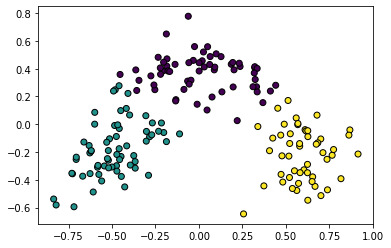

In [51]:
plt.scatter(data[:,0], data[:,1], c=cluster, linewidth =1, edgecolor='black') #c는 color로 품종에 따른 색깔을 미리 선언해둠
plt.show()


## 2. Hierarchical Clustering
Hierarchical Clustering은 거리(Distance) 또는 유사도(Similarity)를 기반으로 클러스터를 형성하는 알고리즘 입니다.<br> 
모두가 중심점이 된다.(k-means는 정해준다)
k-means Clustering과 다르게 클러스터의 수를 설정해 줄 필요가 없으며, 클러스터 형태를 시각적으로 표현해주는 덴드로그램을 통해 적절한 클러스터의 수를 선택할 수 있습니다.<br>
Hierachichal Clustering에는 Bottom-Up 방식의 Agglomerative Method(적층)와 Top-Down 방식의 Divisive(분열) Method로 나뉩니다.<br>
이번 단원에서는 Agglomerative Method를 사용해 실습을 진행합니다.
<br><br>Agglomerative Method를 사용한 Hierarchical Clustering 알고리즘은 3가지 단계로 이루어집니다.<br>
Step 1. 각 데이터 포인트를 클러스터로 할당합니다. (n개의 클러스터)<br>
Step 2. 가까운 클러스터끼리 병합합니다.<br>
Step 3. 1개의 클러스터가 될 때까지 반복합니다.

### 어떻게 가장 가까운 클러스터를 찾을 수 있을까?
방금전 거리 측정 방법으로 맨하탄 거리, 유클리디언 거리에 대해 배웠었습니다.<br>
k-means에서는 각 클러스터의 중심점 간의 거리로 클러스터간 거리를 계산했었습니다.<br> 이번 수업에서는 새로운 클러스터간 거리를 계산하는 방법에 대해 알아보겠습니다.<br>
#### 1. Single Linkage - 두 클러스터 내의 가장 가까운 점 사이의 거리 
![Single Linkage](./img/Single.png)
#### 2. Complete Linkage - 두 클러스터 내의 가장 먼 점 사이의 거리
![Complete Linkage](./img/Complete.png)
#### 3. Average Linkage - 두 클러스터 내의 모든 점 사이의 평균 거리
![Average Linkage](./img/Average.png)

3개 거리 측정 방식의 결과와 차이점을 살펴보겠습니다.

### Single Linkage

#### 1) 모델 불러오기 및 정의하기

In [71]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single') #n_cluster 뒤에 s붙는 복수형
#single은 가장 가까운 점 사이의 거리, complete는 클러스터 내에서 가장 먼 점 사이의 거리, avarage는 두 클러스트 내에서 모든 점의 평균 거리

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [72]:

single_clustering.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

#### 3) 클러스터 할당

In [77]:
#predict
single_cluster = single_clustering.labels_
single_cluster
#대부분 0이라는 것은 잘못 된 것이다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### 4) 결과 살펴보기
* 산점도

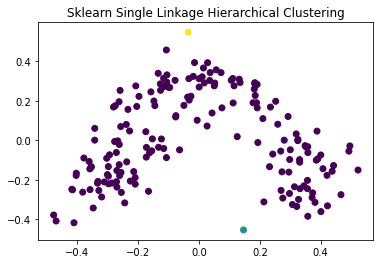

In [74]:
plt.scatter(data[:,0], data[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()
#single Linkage는 노이즈에 취약하다(편향된다.)

* 덴드로그램

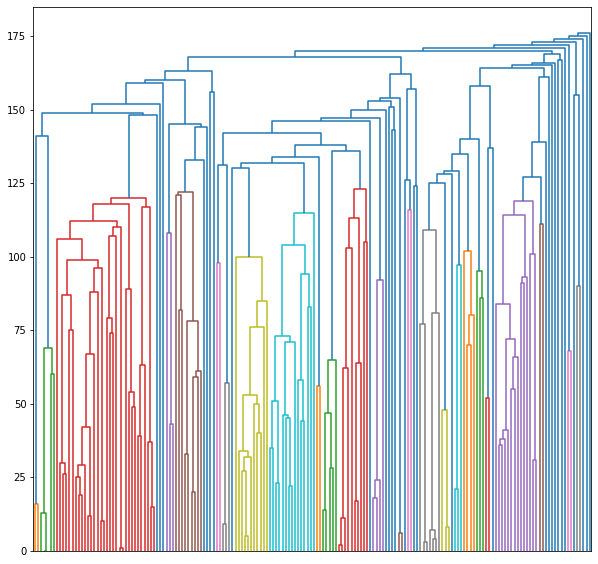

In [75]:
from scipy.cluster.hierarchy import dendrogram #덴도그램? 아무튼 굉장히 치우쳐 보인다.
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = single_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = single_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

### Complete Linkage

#### 1) 모델 불러오기 및 정의하기

In [98]:
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [99]:
complete_clustering.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

#### 3) 클러스터 할당

In [102]:
complete_cluster = complete_clustering.labels_

#### 4) 결과 살펴보기
* 산점도

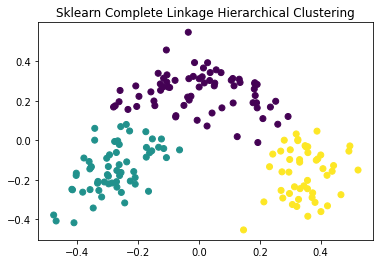

In [103]:
plt.scatter(data[:,0], data[:,1], c=complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')
plt.show()
# single linkage보다는 균형잡혀 있다. 노이즈에 강한 특징이 있다.

* 덴드로그램

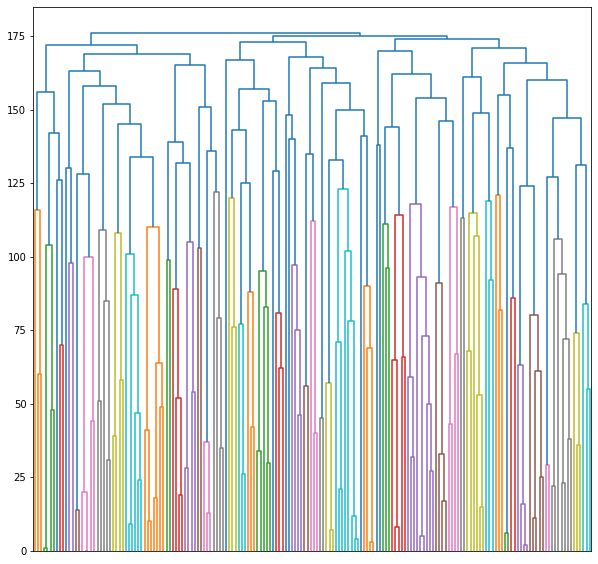

In [104]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = complete_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = complete_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

### Average Linkage

#### 1) 모델 불러오기 및 정의하기

In [106]:
#평균을 잡는 average cluster가 성능이 우수하다.
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [107]:
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

#### 3) 클러스터 할당

In [108]:
average_cluster = average_clustering.labels_

#### 4) 결과 살펴보기
* 산점도

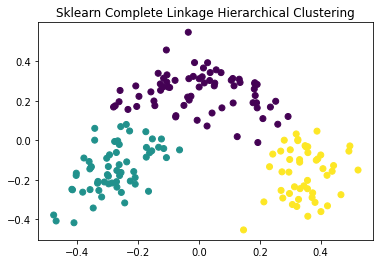

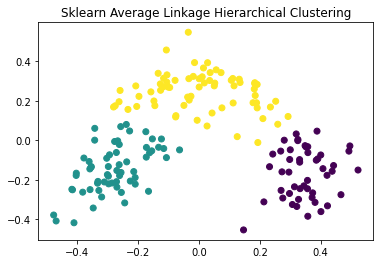

In [110]:
plt.scatter(data[:,0], data[:,1], c=complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')
plt.show()
# single linkage보다는 균형잡혀 있다. 노이즈에 강한 특징이 있다.

plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()
# complete보다 더 balance하다.

* 덴드로그램

In [ ]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

### 클러스터링 결과 비교하기
1. Single Linkage
    + 두 클러스터 내의 가장 가까운 점을 기준으로 클러스터를 합치기 클러스터 사이의 노이즈에 매우 민감한 특성과 구 형태가 아닌 데이터에 대해 클러스터를 잘 형성한다는 특성이 있습니다.
    + wine 데이터는 모든 데이터가 연결되어 있는 듯한 분포를 가지고 있기 때문에, 각 클러스터의 경계가 모호한 노이즈가 많은 형태를 띠고 있습니다. <br>Single Linkage가 구 형태가 아닌 데이터에 대해 클러스터를 잘 형성한다는 특성이 있지만, 이러한 데이터의 경우 Single Linkage 방법을 사용하면 좋은 클러스터를 생성하기 어렵습니다.

In [ ]:
plt.figure(figsize=(5,4))

plt.scatter(data[:,0], data[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()

2. Complete Linkage
    + 두 클러스터 내에 가장 먼 점을 기준으로 클러스터를 합치기 때문에 클러스터 사이의 노이즈와 이상치에 민감하지 않은 특성이 있습니다.
    + 노이즈에 민감하지 않다는 특성을 가진 Complete Linkage가 좋은 성능을 보여주었습니다. 
3. Average Linkage
    + Single Linkage와 Complete Linkage의 중간쯤에 위치한 Average Linkage가 가장 정답에 가까운 클러스터를 형성한 것을 확인할 수 있습니다. 

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(data[:,0], data[:,1], c=complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

## Evaluation
### Silhouette
+ 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냅니다.<br>
+ 같은 클러스터 내의 점들간 거리는 가깝고(cohesion) 서로 다른 클러스터 간의 거리는 멀수록(separation) 높은 값을 얻을 수 있습니다.<br>
+ 실루엣 값이 1에 근접한다는 것은 같은 클러스터 내의 평균거리가 다른 클러스터와의 평균거리보다 가깝다는 것을 의미합니다.
+ 일반적으로 실루엣 값이 0.5보다 크다면 데이터가 잘 클러스터링 되었다는 것을 나타냅니다.

실루엣 공식은 다음과 같습니다.
$$ S_i = { {(b_i - a_i)} \over max(a_i, b_i) }$$

$$ a_i\ :\ 같은\ 클러스터\ 내의\ 모든\ 점들\ 간\ 평균\ 거리 $$
$$ b_i\ :\ \bar d\ =\ (i,c)의\ 최솟값 $$
$$ \bar d\ =\ (i,c)\ :\ 다른\ 클러스터\ c와\ i번째 데이터 와의\ 평균\ 거리$$
<br>

직관적으로 수식을 이해해보겠습니다. a<sub>i</sub>는 같은 클러스터 내의 데이터 들이 잘 모여있다면 적은 값을 나타내고, b<sub>i</sub>는 각 클러스터들이 멀리 떨어져있다면 큰 값을 나타내게 됩니다.<br>
따라서 수식 S<sub>i</sub>에 따르면, 아주 잘 형성된(같은 클러스터는 가깝고 다른 클러스터끼리는 먼) 클러스터 형태일 때 분모는 b<sub>i</sub>이 되고,<br> 분자는 b<sub>i</sub>에서 아주 작은 값인 a<sub>i</sub>가 빠져 1에 가까운 실루엣 값을 얻을 수 있습니다.

#### 가장 좋은 클러스터를 형성하는 클러스터의 수를 찾아보자
k-means 클러스터링과 Average Linkage를 사용한 Hierarchical 클러스터링에서 가장 높은 점수의 클러스터 수는 무엇인지 알아보겠습니다.

Silhouette 스코어링은 Sklearn의 metrics 패키지에 있습니다.

#### 1) k-means

In [131]:
from sklearn.metrics import silhouette_score

In [132]:
best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.46
클러스터의 수 : 3, 실루엣 점수 : 0.58
클러스터의 수 : 4, 실루엣 점수 : 0.50
클러스터의 수 : 5, 실루엣 점수 : 0.44
클러스터의 수 : 6, 실루엣 점수 : 0.44
클러스터의 수 : 7, 실루엣 점수 : 0.42
클러스터의 수 : 8, 실루엣 점수 : 0.40
클러스터의 수 : 9, 실루엣 점수 : 0.42
클러스터의 수 : 10, 실루엣 점수 : 0.38
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.58


#### 2) Average Linkage Hierarchical Clustering

In [133]:
from sklearn.metrics import silhouette_score

best_n =1
best_score = -1

for n_cluster in range(2,11):#클러스터의 개수를 2개부터 11개일 때까지 높여본다.
    average_clustering = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    average_clustering.fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)#유클르디안 방식 사용
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score>best_score:
        best_n = n_cluster
        best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터의 수 : {}, 실루엣 점수: {:.2f}'.format(best_n, best_score))
#0.5이상이면 클러스터링이 잘 된 것이다. 3번으로 간다.
#.2f는 숫자가 들어올 시 자릿수를 두자리수로 제한함을 의미 한다.

클러스터의 수 : 2, 실루엣 점수 : 0.47
클러스터의 수 : 3, 실루엣 점수 : 0.57
클러스터의 수 : 4, 실루엣 점수 : 0.51
클러스터의 수 : 5, 실루엣 점수 : 0.44
클러스터의 수 : 6, 실루엣 점수 : 0.35
클러스터의 수 : 7, 실루엣 점수 : 0.32
클러스터의 수 : 8, 실루엣 점수 : 0.34
클러스터의 수 : 9, 실루엣 점수 : 0.37
클러스터의 수 : 10, 실루엣 점수 : 0.39
가장 높은 실루엣 점수를 가진 클러스터의 수 : 3, 실루엣 점수: 0.57


### Reference
- Wikipedia, Clustering : https://ko.wikipedia.org/wiki/클러스터_분석
- Wikipedia, Manhattan distance : https://ko.wikipedia.org/wiki/맨해튼_거리
- Wikipedia, Euclidean distance : https://ko.wikipedia.org/wiki/유클리드_거리
- Sklearn, Wine dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
- Sklearn, k-Means Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Sklearn, Hierarchical Clustering : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html&sa=U&ved=0ahUKEwj_2aiGvt7hAhXLi7wKHei8CNsQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw0zVZAVTxgORo-7LbgrNv_o
- Sklearn, Silhouette : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html&sa=U&ved=0ahUKEwi5lrTZwd7hAhUqCqYKHWCZCTEQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw0-ZT8AJZRmR-qNpN-62Ei-
- Sklearn, Silhouette Example : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
- Scipy, Dendrogram : https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html